In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# read data
reviews_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Hotel_Reviews.csv")
# append the positive and negative text reviews
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
# create the label
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [ ]:
# Sample 100,000 rows from the DataFrame
reviews_df = reviews_df.sample(n=100000, random_state=42)

# Reset the index of the DataFrame
reviews_df = reviews_df.reset_index(drop=True)

# Print the updated DataFrame
print(reviews_df.head())

                                              review  is_bad_review
0   Would have appreciated a shop in the hotel th...              0
1   No tissue paper box was present at the roomNo...              0
2                Pillows  Nice welcoming and service              0
3  No Negative Everything including the nice upgr...              0
4        No Negative Lovely hotel v welcoming staff               0


In [ ]:
reviews_df.shape

(100000, 2)

In [ ]:
# Sample data
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)
# remove 'No Negative' or 'No Positive' from text
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [ ]:
reviews_df

,review,is_bad_review
75721,Great location in the middle of Barcelona Att...,0
80184,Functional nice bed and shower Didn t experie...,0
19864,My bed was a bit uncomfortable springy like a...,0
76699,The staff couldn t have been more friendly an...,0
92991,Central location,0
...,...,...
5002,The breakfast is excellent a huge choice and ...,0
30151,Nothing everything was perfect Loved this pl...,0
93194,Lack of space some noise from stairs thin wal...,0
73199,Although not in city centre it was very close...,0


In [ ]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

#nltk.download('omw-1.4')
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]

    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))
print(reviews_df)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                  review  is_bad_review  \
75721   Great location in the middle of Barcelona Att...              0   
80184   Functional nice bed and shower Didn t experie...              0   
19864   My bed was a bit uncomfortable springy like a...              0   
76699   The staff couldn t have been more friendly an...              0   
92991                                   Central location              0   
...                                                  ...            ...   
5002    The breakfast is excellent a huge choice and ...              0   
30151   Nothing everything was perfect  Loved this pl...              0   
93194   Lack of space some noise from stairs thin wal...              0   
73199   Although not in city centre it was very close...              0   
74479   Room to hot and could not get the wi fi The s...              0   

                                            review_clean  
75721  great location middle barcelona a

In [ ]:
# add sentiment analysis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
reviews_df.shape

(10000, 7)

In [ ]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [ ]:
reviews_df


,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words
75721,Great location in the middle of Barcelona Att...,0,great location middle barcelona attentive help...,0.064,0.706,0.231,0.7964,213,38
80184,Functional nice bed and shower Didn t experie...,0,functional nice bed shower experience anything...,0.000,0.741,0.259,0.4215,63,11
19864,My bed was a bit uncomfortable springy like a...,0,bed bit uncomfortable springy like water purch...,0.055,0.467,0.479,0.9888,283,51
76699,The staff couldn t have been more friendly an...,0,staff friendly helpful commend great location ...,0.000,0.644,0.356,0.9562,225,41
92991,Central location,0,central location,0.000,1.000,0.000,0.0000,17,3
...,...,...,...,...,...,...,...,...,...
5002,The breakfast is excellent a huge choice and ...,0,breakfast excellent huge choice excellent qual...,0.086,0.414,0.500,0.9186,123,24
30151,Nothing everything was perfect Loved this pl...,0,nothing everything perfect love place stay eve...,0.089,0.620,0.291,0.9622,350,68
93194,Lack of space some noise from stairs thin wal...,0,lack space noise stair thin wall excellent loc...,0.032,0.727,0.241,0.9313,344,63
73199,Although not in city centre it was very close...,0,although city centre close tram stop take ever...,0.089,0.770,0.141,0.3134,119,24


In [ ]:
#The next step consist in extracting vector representations for every review.
#The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts
#in which they appear (Word2Vec). This is performed using shallow neural networks.
#What's interesting is that similar words will have similar representation vectors.

#Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec).
#Same texts will also have similar representations and that is why we can use those vectors as training features.
#We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [ ]:
reviews_df

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,word_abit,...,word_world,word_worn,word_worth,word_would,word_write,word_wrong,word_year,word_yes,word_yet,word_young
75721,Great location in the middle of Barcelona Att...,0,great location middle barcelona attentive help...,0.064,0.706,0.231,0.7964,213,38,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80184,Functional nice bed and shower Didn t experie...,0,functional nice bed shower experience anything...,0.000,0.741,0.259,0.4215,63,11,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19864,My bed was a bit uncomfortable springy like a...,0,bed bit uncomfortable springy like water purch...,0.055,0.467,0.479,0.9888,283,51,0.0,...,0.0,0.0,0.219769,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76699,The staff couldn t have been more friendly an...,0,staff friendly helpful commend great location ...,0.000,0.644,0.356,0.9562,225,41,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92991,Central location,0,central location,0.000,1.000,0.000,0.0000,17,3,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,The breakfast is excellent a huge choice and ...,0,breakfast excellent huge choice excellent qual...,0.086,0.414,0.500,0.9186,123,24,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30151,Nothing everything was perfect Loved this pl...,0,nothing everything perfect love place stay eve...,0.089,0.620,0.291,0.9622,350,68,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93194,Lack of space some noise from stairs thin wal...,0,lack space noise stair thin wall excellent loc...,0.032,0.727,0.241,0.9313,344,63,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73199,Although not in city centre it was very close...,0,although city centre close tram stop take ever...,0.089,0.770,0.141,0.3134,119,24,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.9564
1    0.0436
Name: is_bad_review, dtype: float64

In [ ]:
#0 represents reviews that are not classified as bad reviews, and its proportion is approximately 0.956176.
#This indicates that around 95.6% of the reviews are classified as good or non-bad reviews.
#1 represents bad reviews, and its proportion is approximately 0.043824.
#This indicates that around 4.4% of the reviews are classified as bad reviews.

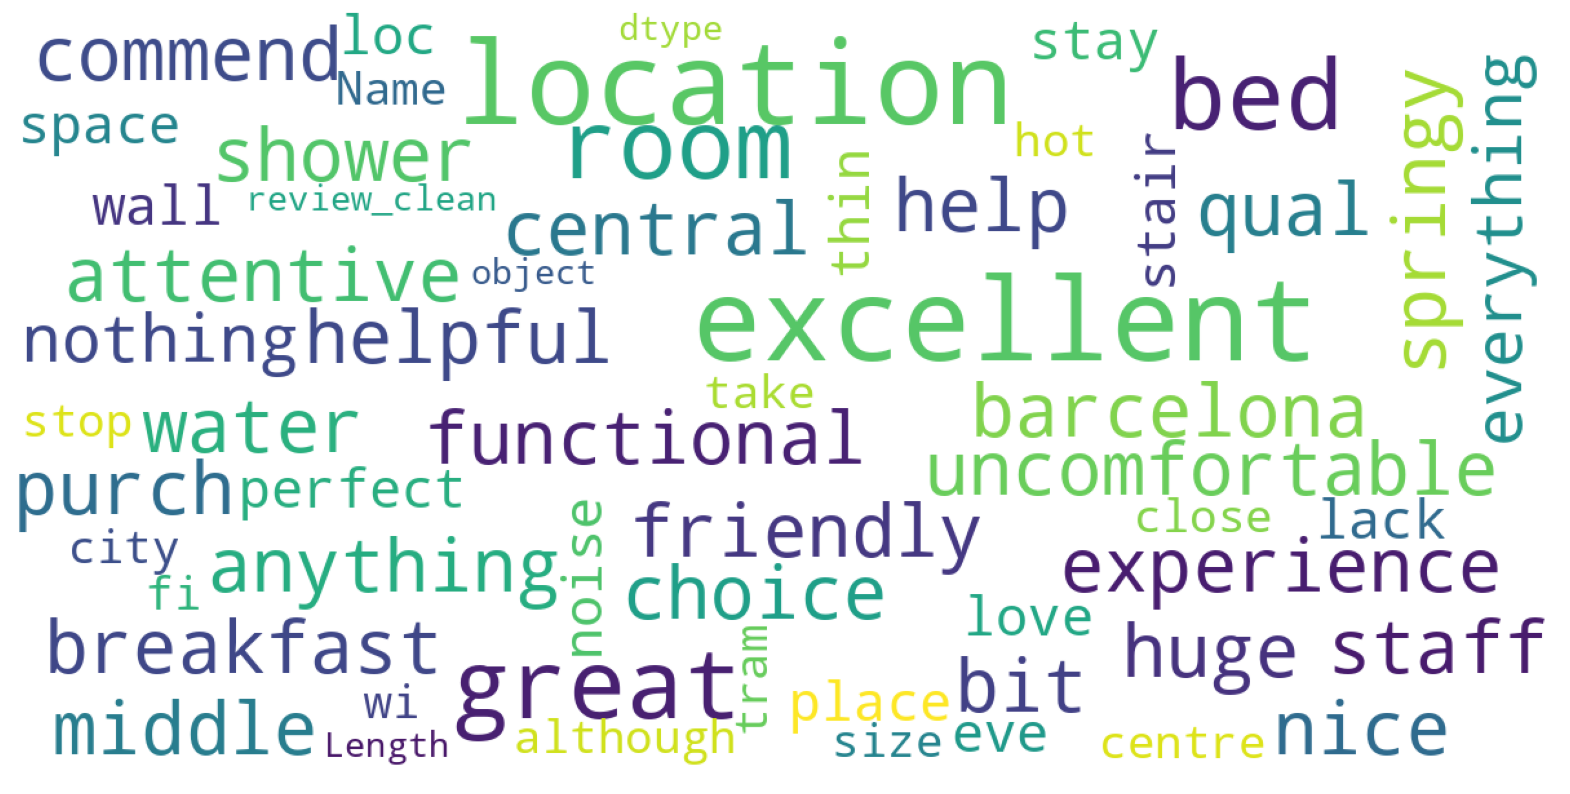

In [ ]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 30,
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    return wordcloud

# print wordcloud
wc=show_wordcloud(reviews_df["review_clean"])

In [ ]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(30)

,review,pos
78494,Efficient friendly smiling fair price,0.919
71731,Fabulous location lovely facility Pretty perf...,0.876
74019,Wow Really Stunning,0.870
55879,Friendly and relaxed,0.865
10214,Friendly helpful staff,0.857
33803,Friendly helpful staff,0.857
50242,Super bed super room super view calm comfortable,0.852
219,Pretty happy really Amazing location,0.846
19274,Excellent friendly staff Comfortable room,0.836
91204,Clean lovely presentation fantastic area,0.835


In [ ]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(20)

,review,neg
15662,A bit noisy No,0.796
85019,Nothing Friendly helpful welcoming staff,0.786
1059,Dirty hotel Smells bad,0.762
6724,Nothing Super friendly staff,0.743
47082,nothing Lovely environment great character gr...,0.707
11806,The street is bad neighbor ugly dirty street,0.660
13053,Nothing Excellent very helpful staff,0.649
68838,Very noisy dangerous neighborhood Nothing,0.642
36841,Nothing Lovely breakfast clean room,0.640
90544,Not very welcoming Good location,0.636


<ipython-input-20-9f6b95e7950f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)
<ipython-input-20-9f6b95e7950f>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['compound'], hist = False, label = label)


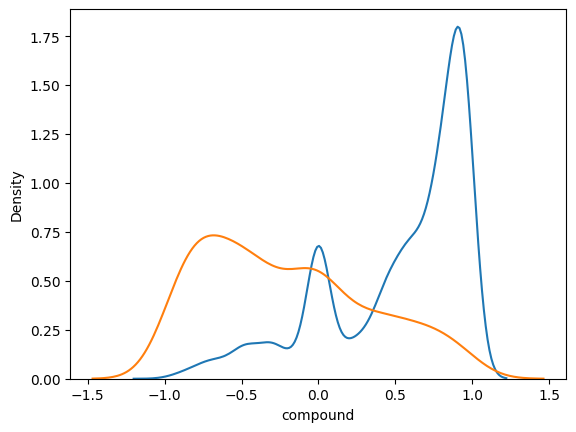

In [ ]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]

    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [ ]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [ ]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.044573
2,pos,0.027748
0,neg,0.026324
4,nb_chars,0.023241
5,nb_words,0.019848
1,neu,0.019492
419,word_dirty,0.018230
1211,word_room,0.013205
119,word_bad,0.012920
829,word_location,0.009292


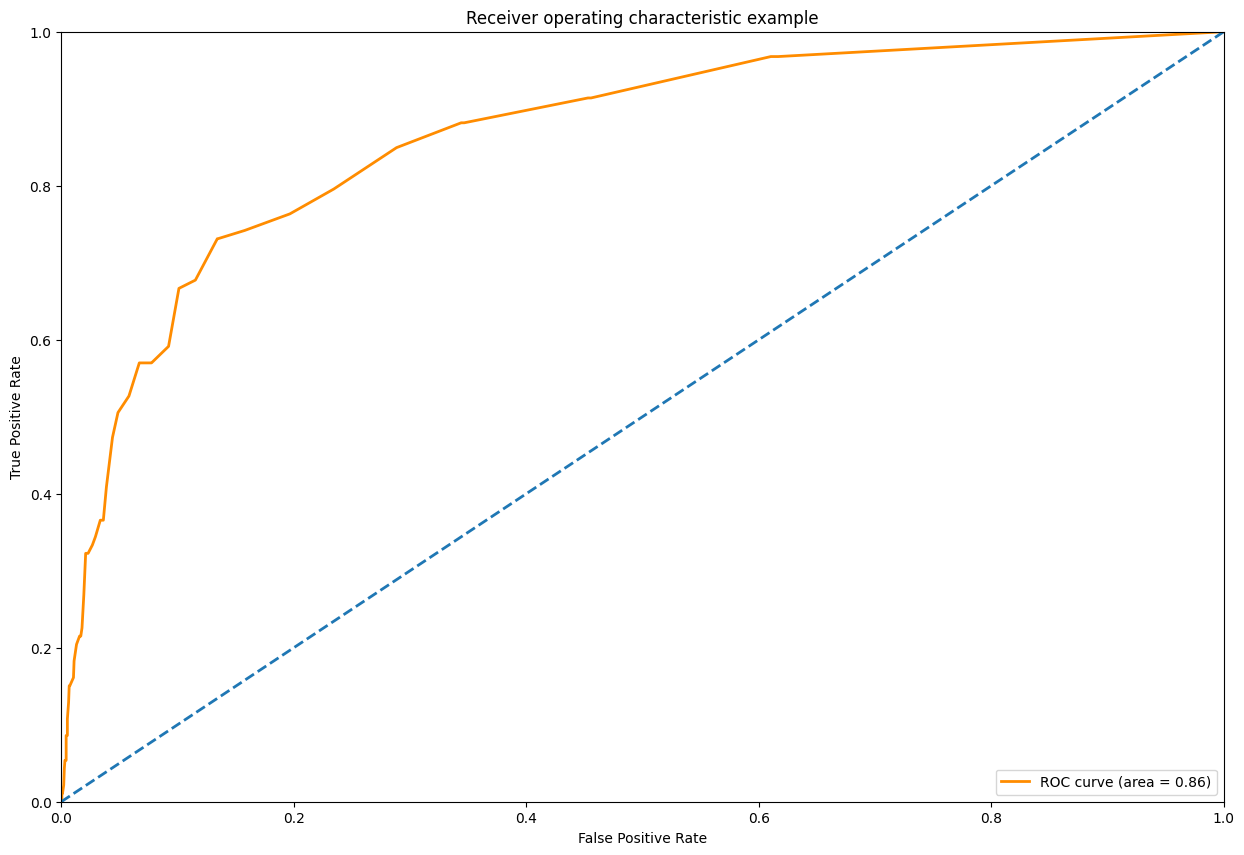

In [ ]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import inspect
from sklearn.metrics import average_precision_score, precision_recall_curve

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Get the signature of the average_precision_score function
average_precision_signature = inspect.signature(average_precision_score)

# Print the parameters of the average_precision_score function
print(average_precision_signature.parameters)


OrderedDict([('y_true', <Parameter "y_true">), ('y_score', <Parameter "y_score">), ('average', <Parameter "average='macro'">), ('pos_label', <Parameter "pos_label=1">), ('sample_weight', <Parameter "sample_weight=None">)])


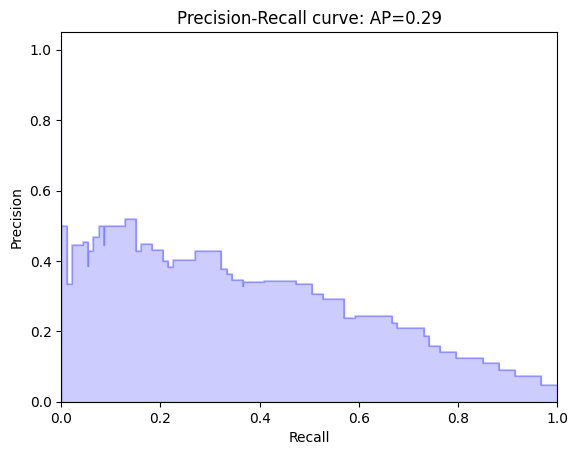

In [ ]:
# PR curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from inspect import signature

average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()


In [ ]:
!pip install textacy



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# IMPORTING NECESSARY LIBRARIES

from textacy import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from gensim.models import Word2Vec
import gensim

In [ ]:
!pip install python-louvain


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Step 1: Create a co-occurrence matrix
co_occurrence_matrix = reviews_df.iloc[:, 7:]  # Select the columns containing the keyword features
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)  # Calculate the co-occurrence matrix

# Step 2: Construct a graph
import networkx as nx
G = nx.from_numpy_matrix(co_occurrence_matrix.values)
G = nx.relabel_nodes(G, dict(enumerate(co_occurrence_matrix.columns)))  # Assign keyword labels to graph nodes

# Step 3: Perform community detection
import community
partition = community.best_partition(G)

# Step 4: Visualize the graph and communities
pos = nx.spring_layout(G)  # Positions for all nodes
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Keyword Co-occurrence Graph")
plt.axis("off")
plt.show()


In [ ]:
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import networkx as nx
import community
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd


In [ ]:


def calcMat(M, opc):
    # Case of V Matrix
    if opc == 1:
        newM = np.dot(M.T, M)
    # Case of U Matrix
    if opc == 2:
        newM = np.dot(M, M.T)

    eigenvalues, eigenvectors = np.linalg.eig(newM)
    ncols = np.argsort(eigenvalues)[::-1]

    # Case of V Matrix, let's transpose it
    if opc == 1:
        return eigenvectors[:, ncols].T
    # Case of U, return normally
    else:
        return eigenvectors[:, ncols]


def calcD(M):
    if np.size(np.dot(M, M.T)) > np.size(np.dot(M.T, M)):
        newM = np.dot(M.T, M)
    else:
        newM = np.dot(M, M.T)

    eigenvalues, eigenvectors = np.linalg.eig(newM)
    eigenvalues = np.sqrt(eigenvalues)
    # Sorting in descending order as the svd function does
    return eigenvalues[::-1]


# Step 1: Create a co-occurrence matrix
#co_occurrence_matrix = pd.DataFrame.from_dict(reviews_df.iloc[:, 7:].to_dict(), orient='index')

# Step 2: Perform Singular Value Decomposition (SVD)
#U = calcMat(o_occurrence_matrix , opc=500)
#V = calcMat(o_occurrence_matrix , opc=500)
#D = calcD(o_occurrence_matrix )
# Reduce dimensions to 500
#X_Ap = U[:,:k] @ S[0:k,:k] @ VT[:k,:]
# Use the reduced matrices for further analysis.....
query_words = ['comfortable', 'stay', 'bed', 'cozy']
relevant_columns = ['bad_review', 'review_clean', 'neg', 'neu', 'pos', 'compound', 'nb_chars', 'nb_words'] + query_words
##co_occurrence_df = reviews_df[relevant_columns]



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer and fit-transform the review_clean column
count_vectorizer = CountVectorizer(min_df=10)
word_frequency_result = count_vectorizer.fit_transform(reviews_df["review_clean"]).toarray()

# Create a DataFrame from the word frequency results
word_frequency_df = pd.DataFrame(word_frequency_result, columns=count_vectorizer.get_feature_names_out())

# Concatenate the word_frequency_df with reviews_df
r_df = pd.concat([reviews_df, word_frequency_df], axis=1)
print (r_df)
#To create a co-occurrence matrix and find the co-occurrence of the 20 words
#with the highest frequencies in reviews_df, you can follow these steps:
word_frequencies = reviews_df.iloc[:, 8:]  # Select the columns representing word frequencies
word_frequencies_sum = word_frequencies.sum()  # Calculate the sum of frequencies for each word
top_20_words = word_frequencies_sum.nlargest(20).index.tolist()  # Get the 20 words with the highest frequencies
reviews_df_top_words = reviews_df[['review'] + top_20_words]




                                                  review  is_bad_review  \
75721   Great location in the middle of Barcelona Att...            0.0   
80184   Functional nice bed and shower Didn t experie...            0.0   
19864   My bed was a bit uncomfortable springy like a...            0.0   
76699   The staff couldn t have been more friendly an...            0.0   
92991                                   Central location            0.0   
...                                                  ...            ...   
9992                                                 NaN            NaN   
9993                                                 NaN            NaN   
9995                                                 NaN            NaN   
9997                                                 NaN            NaN   
9999                                                 NaN            NaN   

                                            review_clean    neg    neu    pos  \
75721  great locat

NameError: ignored

In [ ]:
reviews_df_top_words


,review,nb_words,word_room,word_location,word_staff,word_hotel,word_breakfast,word_good,word_great,word_friendly,...,word_clean,word_helpful,word_nice,word_excellent,word_nothing,word_comfortable,word_small,word_everything,word_service,word_stay
75721,Great location in the middle of Barcelona Att...,38,0.168011,0.097605,0.093970,0.000000,0.000000,0.000000,0.133313,0.000000,...,0.000000,0.145554,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000
80184,Functional nice bed and shower Didn t experie...,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.232717,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000
19864,My bed was a bit uncomfortable springy like a...,51,0.000000,0.078703,0.075772,0.000000,0.000000,0.103252,0.214992,0.000000,...,0.115412,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.260153
76699,The staff couldn t have been more friendly an...,41,0.000000,0.115236,0.110944,0.000000,0.142993,0.000000,0.314788,0.163196,...,0.000000,0.171846,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000
92991,Central location,3,0.000000,0.398707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5002,The breakfast is excellent a huge choice and ...,24,0.000000,0.000000,0.142067,0.000000,0.183106,0.000000,0.000000,0.208977,...,0.000000,0.220053,0.000000,0.480973,0.00000,0.0,0.0,0.000000,0.0,0.000000
30151,Nothing everything was perfect Loved this pl...,68,0.050429,0.000000,0.056411,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.10341,0.0,0.0,0.110063,0.0,0.096839
93194,Lack of space some noise from stairs thin wal...,63,0.114308,0.066407,0.063934,0.077667,0.082402,0.087120,0.000000,0.094045,...,0.097380,0.000000,0.103933,0.108225,0.00000,0.0,0.0,0.000000,0.0,0.000000
73199,Although not in city centre it was very close...,24,0.000000,0.000000,0.121854,0.000000,0.000000,0.000000,0.000000,0.179244,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.000000


In [2]:
reviews_df_top_words = reviews_df[['review'] + top_20_words]
#reduce the dimensionality of the reviews_df_top_words matrix before creating the co-occurrence matrix.
# This can help speed up the computatio
#  Perform Singular Value Decomposition (SVD)
U = calcMat(reviews_df_top_words , opc=3000)
V = calcMat(reviews_df_top_words , opc=3000)
D = calcD(reviews_df_top_words )
# Reduce dimensions to 500
X_Ap = U[:,:k] @ S[0:k,:k] @ VT[:k,:]
co_occurrence_matrix = X_Ap.T.dot(X_Ap)  ####### edw ειναι το θεμα μου. πως βρισκω τον πινακα συμμεταβλητότητας έχοντας μειώσει το dimensionality problem?
# εχετε καμία πρόταση; αν χρησιμοποιησω ολα τα δεδομενα λεξεων για να φτιαξω τετοιον πινακα προφανως σκαει λόγω μνημης 
#Αν φτιαξω τον πινακα για δείγμα των συνολικών εγγραφων το συνολικό αποτέλεσμα ειναι απλα μια μουτζουρα γράφων στην οπτικοποιηση...
# μπορειτε να με κατευθυνετε; προσπαθω επισης να συνδεσω την ανάλυση που εγινε στο sentiment analysis ή με την συχνοτητα χρήσης συγκεκριμένων λέξεων...
# δυσκολευομαι ομως πολυ να υλοποιησω τετοια πραγματαα


NameError: name 'reviews_df' is not defined

In [ ]:
print (co_occurrence_matrix)

In [ ]:
query_words = ['comfortable', 'stay', 'bed', 'cozy']
relevant_columns = ['bad_review', 'review_clean', 'neg', 'neu', 'pos', 'compound', 'nb_chars', 'nb_words'] + query_words
co_occurrence_df = reviews_df[relevant_columns]


# Step 4: Find similar documents based on the document-topic matrix
document_topic_matrix='comfortable stay comfortable bed cozy'
query_vector = document_topic_matrix # Example query vector
similarity_scores = np.dot(document_topic_matrix, query_vector)
similar_documents_indices = np.argsort(similarity_scores)[::-1]
similar_documents = reviews_df.iloc[similar_documents_indices]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocess the target text
target_text = clean_text('comfortable stay comfortable bed cozy')

# Vectorize the reviews
vectorizer = TfidfVectorizer()
reviews_tfidf = vectorizer.fit_transform(reviews_df['review_clean'])

# Transform the target text into TF-IDF representation
target_tfidf = vectorizer.transform([target_text])

# Calculate cosine similarity between the target text and all reviews
similarity_scores = cosine_similarity(reviews_tfidf, target_tfidf).flatten()

# Sort the similarity scores in descending order
similar_reviews_indices = similarity_scores.argsort()[::-1]

# Retrieve the most similar reviews
similar_reviews = reviews_df.iloc[similar_reviews_indices]

# Print the top 10 similar reviews
print(similar_reviews.head(10))


In [ ]:
print(reviews_tfidf)

In [ ]:
co_occurrence_matrix

In [ ]:

plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_size=20, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Keyword Co-occurrence Graph")
plt.axis("off")
plt.show()